In [154]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import sciann as sn
import pandas as pd

In [155]:
# generate the variable
x = sn.Variable('x', dtype='float64')

In [156]:
# generate the output 
u = sn.Functional('u', [x], 8*[5], 'tanh')

In [157]:
# general equation form
L = -sn.math.diff(u, x, order=2) - sn.exp(x)
C = u*0.0

In [158]:
# generate the model
model = sn.SciModel([x], [L, C, u], optimizer='adam', loss_func='mse', plot_to_file='LE-MODEL.png')
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
D5b_57 (Dense)                  (None, 5)            10          x[0][0]                          
__________________________________________________________________________________________________
sci_activation_94 (SciActivatio (None, 5)            0           D5b_57[0][0]                     
__________________________________________________________________________________________________
D5b_58 (Dense)                  (None, 5)            30          sci_activation_94[0][0]          
___________________________________________________________________________________________

In [172]:
x_train = np.linspace(0, 1, 1000)
x_test = np.linspace(0, 1, 11)

In [160]:
training_history = model.train([x_train], ['zeros', 'zeros', 'zeros'], learning_rate=0.001, epochs=100)


Total samples: 1000 
Batch size: 64 
Total batches: 16 

Epoch 1/100
16/16 [==============================] - 8s 34ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.6861 - sub_3_loss: 2.6787 - mul_20_loss: 0.0000e+00 - u_loss: 0.0072 - lr: 0.0010 - time: 7.5970
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.7832 - sub_3_loss: 1.7683 - mul_20_loss: 0.0000e+00 - u_loss: 0.0155 - lr: 0.0010 - time: 0.1608
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.4308 - sub_3_loss: 1.4141 - mul_20_loss: 0.0000e+00 - u_loss: 0.0165 - lr: 0.0010 - time: 0.1496
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.1673 - sub_3_loss: 1.1457 - mul_20_loss: 0.0000e+00 - u_loss: 0.0218 - lr: 0.0010 - time: 0.2099ize: 60.5714 - loss: 1.2730 - sub_3_loss: 1.2543 - mul_20_loss: 0.0000e+00 - u_loss: 0.0187  
Epoch 5/100
16/16 [===========

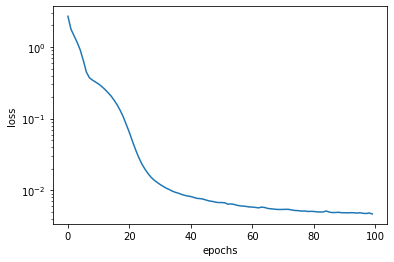

In [161]:
plt.semilogy(training_history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [173]:
# evaluate the test data
u_eval = u.eval(model, [x_test])
u_eval

array([-0.14878428, -0.07993507, -0.02225295,  0.0231696 ,  0.05507034,
        0.07209216,  0.07281953,  0.05560298,  0.0183721 , -0.04132509,
       -0.12582232])

In [163]:
# the weights and biases of model
print(np.array(u.get_weights()).shape)
# the number of parameters
print(u.count_params())

(17,)
226


C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_3628/1516686478.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array(u.get_weights()).shape)


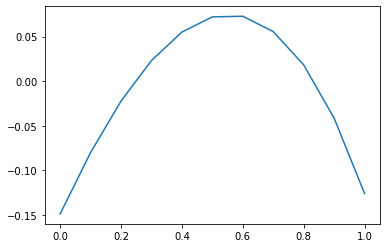

In [175]:
plt.plot(x_test, u_eval)

In [176]:
u_pred = model.predict(x_test)
u_pred

[array([-0.02830589,  0.01433433,  0.00223997,  0.00174306, -0.00412582,
        -0.02121806, -0.03148689, -0.0160082 ,  0.02129323,  0.03032438,
        -0.10804154]),
 array([-0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.]),
 array([-0.14878428, -0.07993507, -0.02225295,  0.0231696 ,  0.05507034,
         0.07209216,  0.07281953,  0.05560298,  0.0183721 , -0.04132509,
        -0.12582232])]

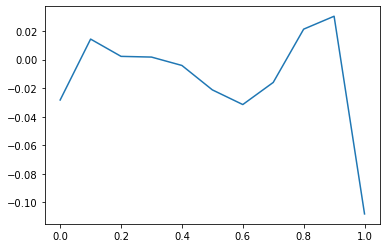

In [179]:
plt.plot(x_test, u_pred[0])

In [167]:
# example prediction 
x = np.array([[0]])
print(model.predict([x]))
print(u.eval(model, [x]))

[array([[-0.02830589]]), array([[-0.]]), array([[-0.14878428]])]
[[-0.14878428]]
